In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **IMPORTING LIBRARIES AND LOADING DATASET**

**IMPORTING LIBRARIES**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

**LOADING DATASET**

In [3]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")

In [4]:
#Show 5 rows of the dataset
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Info about data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **EXPLORATORY DATA ANALYSIS**

Now we will analyze our data to see which variables are actually important to predict the value of the target variable.

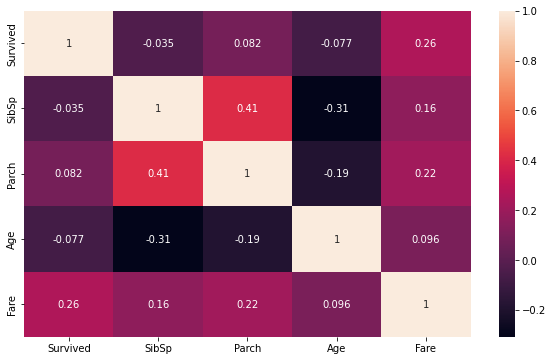

In [6]:
plt.figure(figsize=(10,6))

heatmap = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

Moving on, now we will understand all the features one by one. We’ll visualize the impact of each feature on the target variable. Let us start with SibSp that is the no. of siblings or spouses a passenger has.

**SibSp – Number of Siblings / Spouses aboard the Titanic**

In [7]:
# Find unique values

train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

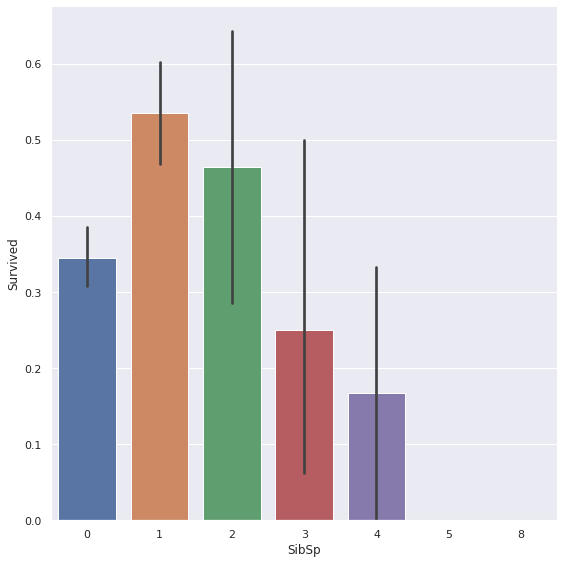

In [8]:

bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train_data, kind="bar", height = 8)

Passengers having 1 or 2 siblings have good chances of survival
More no. of siblings -> Fewer chances of survival

**AGE COLOMN**

We can plot a graph so as to see the distribution of age with respect to target variable.

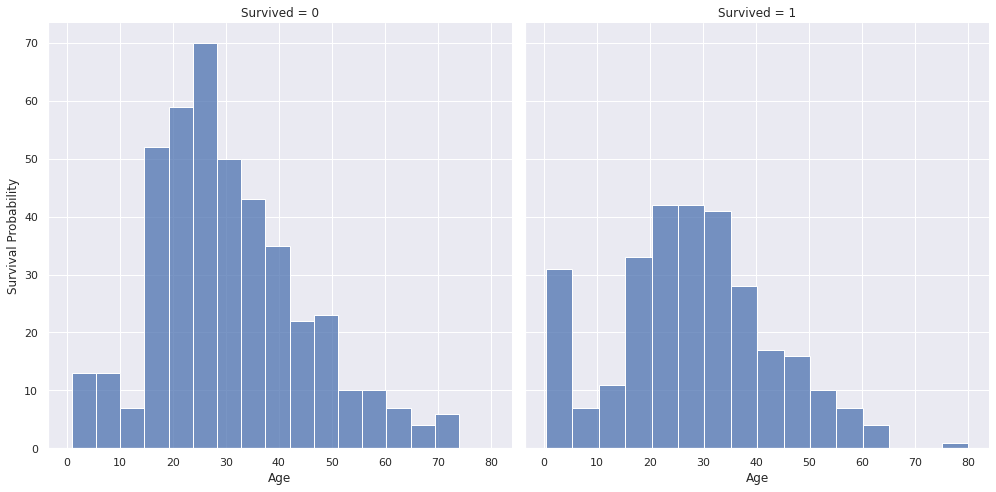

In [9]:

 age = sns.FacetGrid(train_data, col="Survived", height = 7)
age = age.map(sns.histplot, "Age")
age = age.set_ylabels("Survival Probability")

 We can see more age -> less chances of survival!

**GENDER OF COLOMN**

For gender we are simply going to use seaborn and will plot a bar graph.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

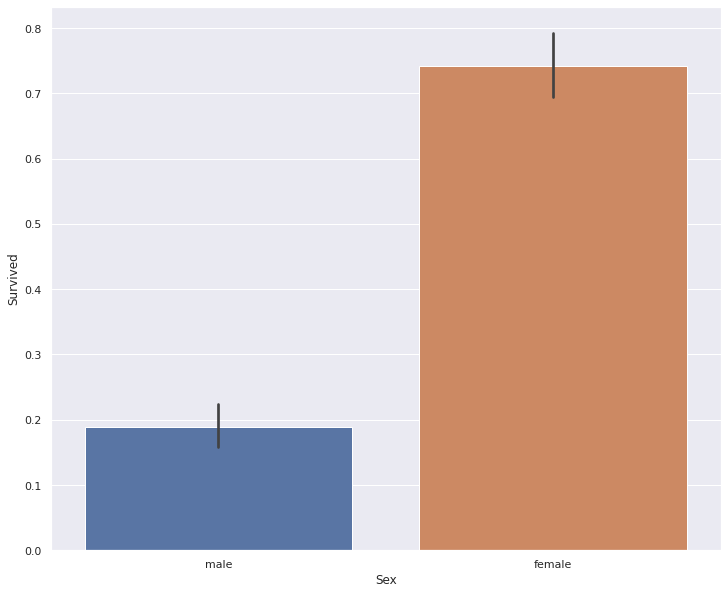

In [10]:
sns.barplot(x="Sex", y="Survived", data=train_data)

We can see from the above graph it’s quite obvious to say that man has less chances of survival over females. 

**PCLASS COLOMN**

Let us now see whether the class plays any role in survival probability or not.

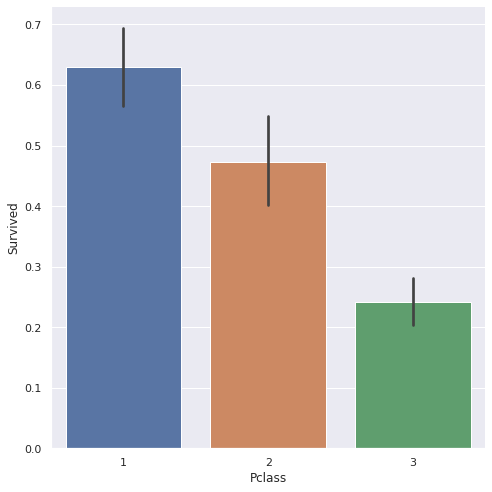

In [11]:
pclass = sns.catplot(x = "Pclass", y="Survived", data = train_data, kind="bar", height = 7)

So we can see a first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.


# **DATA PREPROCESSING**

In [12]:
#Check null values

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see there are 177 missing entries in Age column. 687 missing entries are in Cabin column and 2 missing are in Embarked.

**HANDLE MISSING VALUES OF AGE COLUMN**

In [13]:
mean = train_data["Age"].mean()
std = train_data["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice

train_data["Embarked"].fillna(value="C", inplace=True)


# Again checking for null values
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We can see, we don't have missing values

**DROP COLUMN**

In [14]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train_data.drop(col_to_drop, axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,38.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**CONVERTING CATEGORICAL VARIABLES TO NUMERIC**

In [15]:
genders = {"male":0, "female":1}
train_data["Sex"] = train_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
train_data["Embarked"] = train_data["Embarked"].map(ports)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# **BUILDING MACHINE LEARNING MODEL**

So, this was all about data preprocessing. Now we are good to go with our titanic dataset. Let’s quickly train our machine learning model.

In [16]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = train_data['Survived']

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

**Lastly, We are going to fit our model on 5 different classification algorithms namely RANDOM FOREST CLASSIFIER, LOGISTIC REGRESSION, K-NEIGHBOR CLASSIFIER, DECISSION TREE CLASSIFIER, and SUPPORT VECTOR MACHINE. And eventually will compare them.**

**RANDOM FOREST**

In [17]:
# Creating alias for Classifier
model1 = RandomForestClassifier()

# Fitting the model using training data
model1 = model1.fit(x_train, y_train)

# Predicting on test data
rfc_y_pred = model1.predict(x_test)

# Calculating Accuracy to compare all models
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 82.12290502793296


**LOGISTIC REGRESSION**

In [18]:
model2 = LogisticRegression( max_iter=2000 )
model2 = model2.fit(x_train, y_train)
lr_y_pred = model2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 79.88826815642457


**K-NEIGHBOR CLASSIFIER**

In [19]:
model3 = KNeighborsClassifier(5)
model3 = model3.fit(x_train, y_train)
knc_y_pred = model3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 68.15642458100558


**DECISSION TREE CLASSIFIER**

In [20]:
model4 = tree.DecisionTreeClassifier()
model4 = model4.fit(x_train, y_train)
dtc_y_pred = model4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 74.86033519553072


**SUPPORT VECTOR MACHINE**

In [21]:
model5 = svm.SVC()
model5 = model5.fit(x_train, y_train)
svm_y_pred = model5.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)*100
print("accuracy=",svm_accuracy)

accuracy= 65.36312849162012


**ACCURACY SCORES OF All CLASSIFIERS**

In [22]:
print("Accuracy of RANDOM FOREST CLASSIFIER =",rfc_accuracy)
print("Accuracy of LOGISTIC REGRESSION =",lr_accuracy)
print("Accuracy of K-NEIGHBOR CLASSIFIER =",knc_accuracy)
print("Accuracy of DECISION TREE CLASSIFIER = ",dtc_accuracy)
print("Accuracy of SUPPORT VECTOR MACHINE = ",svm_accuracy)

Accuracy of RANDOM FOREST CLASSIFIER = 82.12290502793296
Accuracy of LOGISTIC REGRESSION = 79.88826815642457
Accuracy of K-NEIGHBOR CLASSIFIER = 68.15642458100558
Accuracy of DECISION TREE CLASSIFIER =  74.86033519553072
Accuracy of SUPPORT VECTOR MACHINE =  65.36312849162012


Subsequently, we can now rank our evaluation of all the models to choose the best one for our problem. While Random Forest and Logistic Regression score almost the same.

# **FINAL PREDICTION WITH MACHINE LEARNING MODEL**

So, now it’s time to use test.csv for making predictions. For testing data also we need to do the steps of preprocessing that we did earlier. And then only we can predict whether a passenger will survive or not. Hence, I highly encourage you to do all the things for test.csv by yourself.

In [23]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
# Replacing missing values of age column
mean = test_data["Age"].mean()
std = test_data["Age"].std()
rand_age = np.random.randint(mean-std, mean+std, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

# Replacing missing value of Fare column
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [27]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [28]:
genders = {"male":0, "female":1}
test_data["Sex"] = test_data["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
test_data["Embarked"] = test_data["Embarked"].map(ports)

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


# **MACHINE LEARNINIG PROJECT SUBMISSION**

In [29]:
x_test = test_data
y_pred = model1.predict(x_test)
originaltest_data = pd.read_csv('/kaggle/input/titanic/test.csv')

submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


**Thankyou! If you like this article leave a comment “Nice article!” to motivate me. Keep learning, keep coding!**